<a href="https://colab.research.google.com/github/Creator-Codie-afk/my-first-repo/blob/main/Copy_of_SelfTaughtAutoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
# Generate synthetic data
normal_data = np.random.normal(0, 1, (1000, 10))
anomaly_data = np.random.normal(5, 1, (100, 10))
data = np.concatenate([normal_data, anomaly_data], axis=0)
labels = np.concatenate([np.zeros(1000), np.ones(100)], axis=0)

In [7]:
input_dim = data.shape[1]
encoding_dim = 64  # Size of the encoded representation

# Define the autoencoder model
input_layer = layers.Input(shape=(input_dim,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_layer)
decoded = layers.Dense(input_dim, activation='sigmoid')(encoded)
autoencoder = models.Model(input_layer, decoded)

# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [8]:
autoencoder.fit(normal_data, normal_data, epochs=100, batch_size=32, shuffle=True)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.2405   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0878 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9796 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9032 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8275 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7926 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7717 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7221 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6710 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6820 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6564 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6467
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6322 
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6066 
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - lo

In [10]:
# Calculate reconstruction error
reconstructed_data = autoencoder.predict(data)
reconstruction_error = np.mean(np.square(data - reconstructed_data), axis=1)

# Set a threshold for anomaly detection
threshold = np.percentile(reconstruction_error, 95)

# Classify data points as normal or anomalous
predictions = (reconstruction_error > threshold).astype(int)

35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [11]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(labels, predictions)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1000    0]
 [  45   55]]


In [13]:
from sklearn.metrics import classification_report

# Generate classification report
class_report = classification_report(labels, predictions)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1000
         1.0       1.00      0.55      0.71       100

    accuracy                           0.96      1100
   macro avg       0.98      0.78      0.84      1100
weighted avg       0.96      0.96      0.95      1100



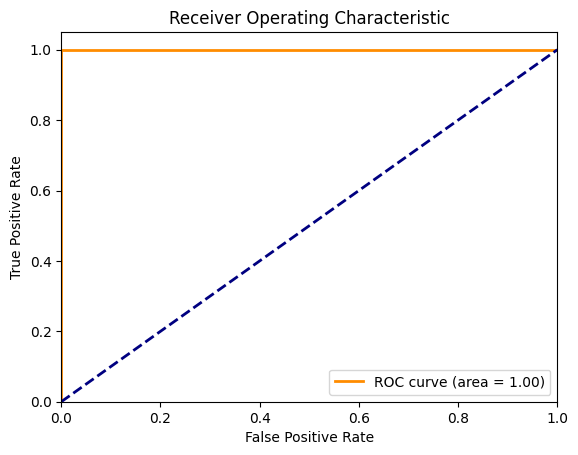

In [15]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the false positive rate and true positive rate
fpr, tpr, _ = roc_curve(labels, reconstruction_error)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

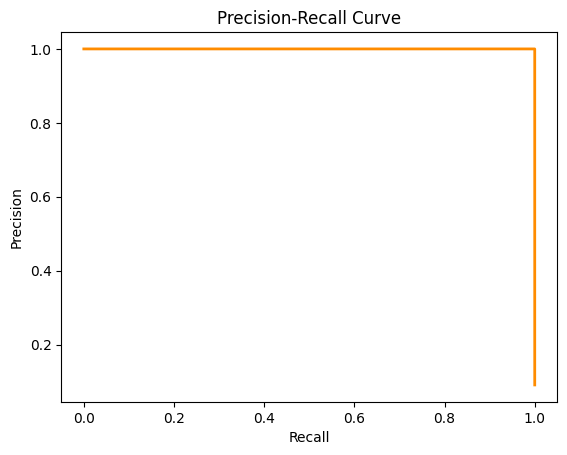

In [16]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(labels, reconstruction_error)

# Plot the precision-recall curve
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()